<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20. Numerical Diferentiation

Some functions are not explicitly obvious to find the differentiation. Therefore, numerical methods are extremely helpful in this case.

20.1 Numerical Differentiation Problem Statement

We usually divide a space interval into a numerical grid evenly spaced.

The spacing or step size is chosed by us to perform calculations up to a certain accuracy.

There are many methods to create the interval and the space.

We can use linspace method from the numpy library or we could do it manually.

In [ ]:
import numpy as np
grid_start = 0
grid_end = 10
#use the linspace method into 20 grid points
x_grid = np.linspace(grid_start,grid_end, 20)
print((x_grid))

#we can use a "traditional" method
step = (grid_end-grid_start)/19
x_new_grid=[]
for i in range(20):
  x_new_grid.append(grid_start+i*step)
print((x_new_grid))

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[0.0, 0.5263157894736842, 1.0526315789473684, 1.5789473684210527, 2.1052631578947367, 2.631578947368421, 3.1578947368421053, 3.6842105263157894, 4.2105263157894735, 4.7368421052631575, 5.263157894736842, 5.789473684210526, 6.315789473684211, 6.842105263157895, 7.368421052631579, 7.894736842105263, 8.421052631578947, 8.947368421052632, 9.473684210526315, 10.0]


20.2 Finite Difference Approximating Derivatives

The derivative is defined as $f'(a)=lim_{x \rightarrow a}\frac{f(x)-f(a)}{x-a}$.

To numerically find the derivative, we can use the difference from the neighboring points to calculate the derivate. There are several ways to do so such as forward, backward or central difference

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
[0.11890606420927469, 0.8323424494649229, 2.259215219976219, 4.399524375743163, 7.253269916765756, 10.820451843043998, 15.101070154577874, 20.09512485136743, 25.802615933412625, 32.22354340071347, 39.3579072532699, 47.20570749108208, 55.76694411414987, 65.04161712247328, 75.02972651605238, 85.73127229488706, 97.14625445897751, 109.27467300832348, 122.11652794292529, 135.67181926278244, 149.94054696789553, 164.92271105826404, 180.61831153388832, 197.02734839476835, 214.14982164090364, 231.98573127229537, 250.53507728894186, 269.79785969084446, 289.7740784780025]
[0.11890606420927469, 0.8323424494649229, 2.259215219976219, 4.399

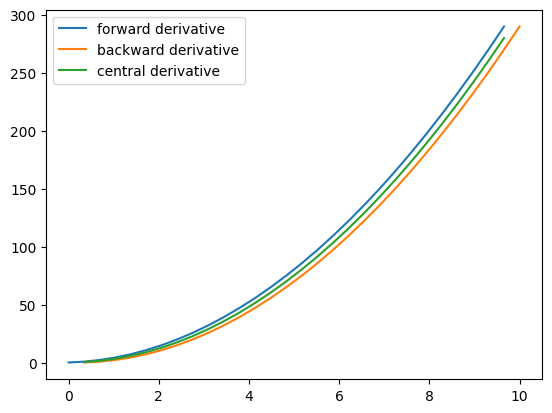

In [ ]:
import matplotlib.pyplot as plt

def derivative(f,a,method='central',h=0.05): #default results
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

def func(x): #define y=x^2
  return x**3

#create the grid
x = np.linspace(0,10,30)
h=10/29
print(x)
y = func(x)

forward_derivative = []
#find the forward space
for i in (range(len(x)-1)):
  forward_derivative.append(derivative(func,x[i],method='forward',h=10/29))
print(forward_derivative)

backward_derivative = []
#find the forward space
for i in (range(len(x)-1)):
  backward_derivative.append(derivative(func,x[i+1],method='backward',h=10/29))
print(backward_derivative)

central_derivative = []
#find the forward space
for i in (range(len(x)-2)):
  central_derivative.append(derivative(func,x[i+1],method='central',h=10/29))


plt.plot(x[:-1],forward_derivative, label='forward derivative')
plt.plot(x[1:],backward_derivative, label='backward derivative')
plt.plot(x[1:-1],central_derivative, label='central derivative')
plt.legend()
plt.show()

20.3 Approximating of Higher Order Approximations
By approximating the exact function with a Taylor series, we can come up with higher order approximations.

For example, the second order approximation is:
$f''(x_j)\approx \frac{f(x_{j+1}-2f(x_j)+f(x_{j-1}))}{h^2}$

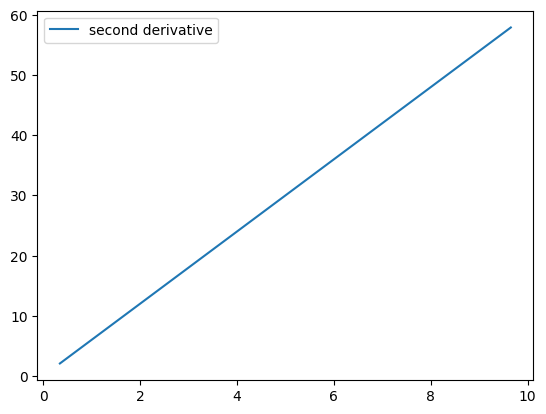

In [ ]:
def second_derivative(f,a,h): #default results
  return (f(a + h) - 2*f(a)+f(a-h))/(h**2)

second_derivative_values = []
h = 10/29
for i in (range(len(x)-2)):
  second_derivative_values.append(second_derivative(func,x[i+1],h))

plt.plot(x[1:-1],second_derivative_values, label='second derivative')
plt.legend()
plt.show()

20.4 Numerical Differentiation with Noise

Noise in numerical differentiation is usually present in numerical methods. These errors might be from outside of the system or by pure numerical roundoff

Let us test $f(x)=sin(x)$ and $f(x)=sin(x)+ϵcos(x)$

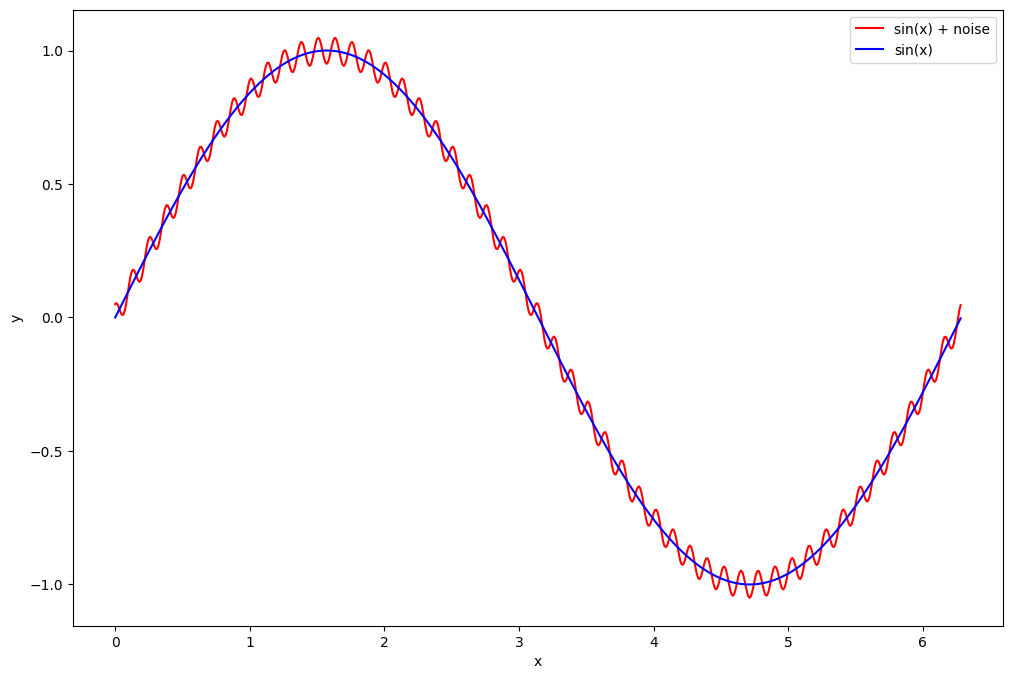

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 50
epsilon = 0.05

y = np.sin(x)
y_noise = y + epsilon*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'sin(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'sin(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


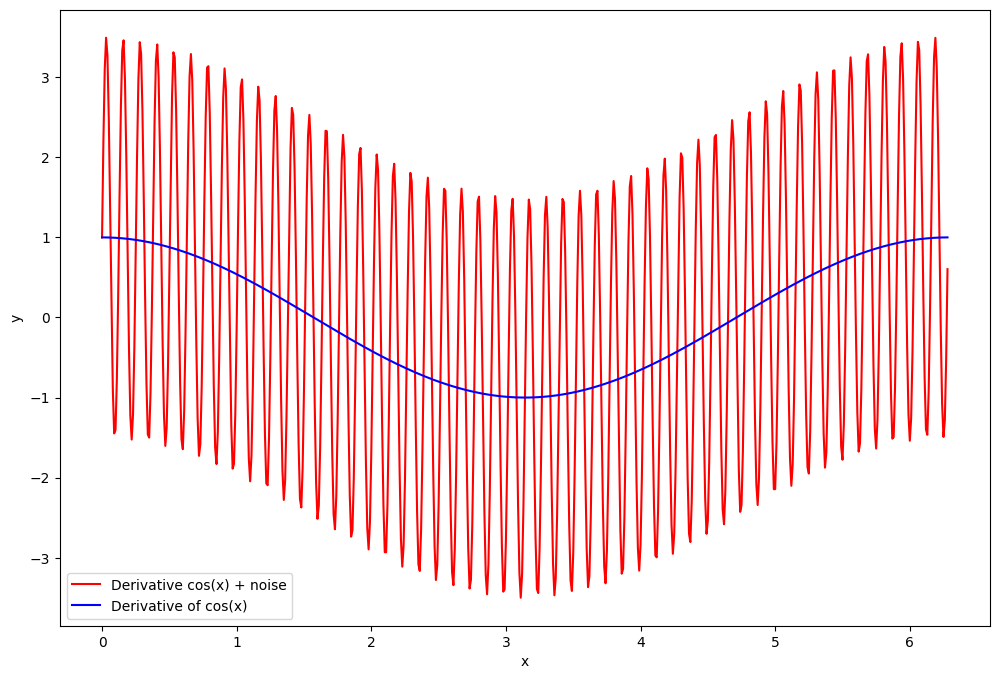

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = np.cos(x)
y_noise = y + epsilon*omega*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()